In [1]:
# examples from Probabilistic Deep Learning book 
# https://github.com/tensorchiefs/dl_book 
# copied from notebook nb_ch06_03


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
%matplotlib inline
plt.style.use('default')

tfd = tfp.distributions
tfb = tfp.bijectors
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
print("TF  Version",tf.__version__)
print("TFP Version", tfp.__version__)


TF  Version 2.6.0
TFP Version 0.14.0


# Fitting the Old Faithful

(272, 1)

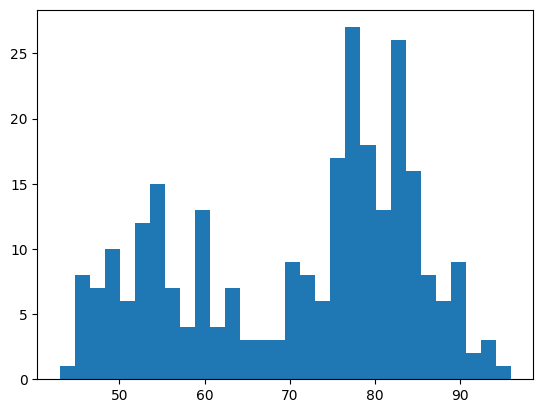

In [2]:
df1 = pd.read_csv('faithful.csv', delimiter=',')
X = np.asarray(df1.iloc[:,2],dtype='float32').reshape((-1,1))  # waiting time
plt.hist(X,30)
X.shape

In [3]:
df1.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


## Introducing Nonlinearity via SinhArcsinh bijector

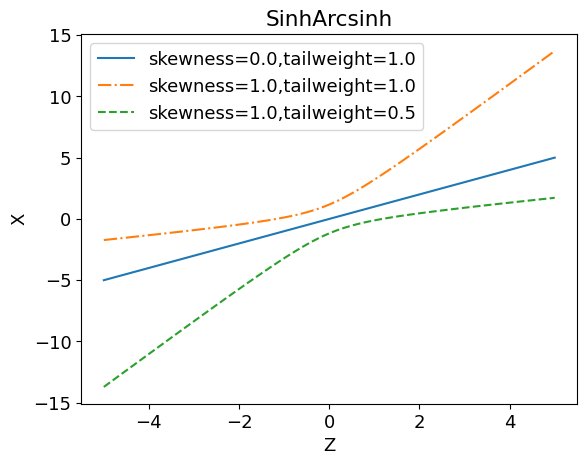

In [4]:
plt.rcParams.update({'font.size': 13}) #Macht grosse axen
zs = np.linspace(-5,5,100, dtype=np.float32)
plt.plot(zs, tfb.SinhArcsinh(skewness=0.0,tailweight=1.0).forward(zs))
plt.plot(zs, tfb.SinhArcsinh(skewness=1.0,tailweight=1.0).forward(zs),linestyle='-.')
plt.plot(zs, tfb.SinhArcsinh(skewness=-1.0,tailweight=1.0).forward(zs),linestyle='--')
plt.xlabel('Z')
plt.ylabel('X')
plt.title('SinhArcsinh')
plt.legend(['skewness=0.0,tailweight=1.0','skewness=1.0,tailweight=1.0','skewness=1.0,tailweight=0.5'])

In [5]:
num_bijectors = 5 #A 
bs=[]
for i in range(num_bijectors):
    bs.append(tfb.Shift(shift=tf.Variable(0.0)))
    bs.append(tfb.Scale(scale=tf.Variable(1.0))) #B
    bs.append(tfb.SinhArcsinh(skewness=tf.Variable(0.0), tailweight=tf.Variable(1.0))) #C
    

bijector = tfb.Chain(bs) #D
dist = tfd.TransformedDistribution(
    distribution= tfd.Normal(loc=0,scale=1),
    bijector=bijector)

#A Number of layers
#B The Shift + Scale transformation
#C The SinhArcsinh acting as non-linearity
#D Creates the chain of bijectors from the list bijectors

In [6]:
dir(bijector)

['_Composition__is_injective',
 '_Composition__is_permutation',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__abstractmethods__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_batch_shape',
 '_batch_shape_tensor',
 '_bijectors',
 '_bijectors_trackable',
 '_broadcast_parameters_with_batch_shape',
 '_cache',
 '_call_forward',
 '_call_forward_log_det_jacobian',
 '_call_inverse',
 '_call_inverse_log_det_jacobian',
 '_call_is_increasing',
 '_call_walk_forward',
 '_call_walk_inverse',
 '_checkpoint_dependencies',
 '_composite_tensor_nonshape_params',
 '_composite_tensor_params',
 '_composite_tensor_shape_params',
 '

In [7]:
bijector.name

'chain_of_shift_of_scale_of_sinh_arcsinh_of_shift_of_scale_of_sinh_arcsinh_of_shift_of_scale_of_sinh_arcsinh_of_shift_of_scale_of_sinh_arcsinh_of_shift_of_scale_of_sinh_arcsinh'

In [8]:
bijector.trainable_variables # these will be trained

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, nump

In [9]:
tf.reduce_mean(dist.log_prob(X)) # TransformDistribution's log prob


<tf.Tensor: shape=(), dtype=float32, numpy=-2606.188>

In [10]:
dist.trainable_variables #  TransformDistribution's trainable variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, nump

In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

@tf.function #Compiles function for fast execution
def train_step(X):
    with tf.GradientTape() as tape:
        loss = -tf.reduce_mean(dist.log_prob(X)) # TransformDistribution's log prob as loss
        gradients = tape.gradient(loss, dist.trainable_variables)  #  gradients of trainable variables
        optimizer.apply_gradients(zip(gradients, dist.trainable_variables)) # apply gradients 
        return loss

for i in range(20000):
    loss = train_step(X)
    if (i % 2000 == 0 or i < 5):
        print(i, "NLL ",loss.numpy())

0 NLL  2606.188
1 NLL  1541.5117
2 NLL  962.5717
3 NLL  635.1124
4 NLL  440.90356
2000 NLL  4.3869534
4000 NLL  4.1083465
6000 NLL  4.020764
8000 NLL  3.9419422
10000 NLL  3.8819418
12000 NLL  3.840745
14000 NLL  3.821344
16000 NLL  3.806936
18000 NLL  3.800563


In [12]:
bijector.trainable_variables # variables after training

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.524907>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.2942994>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.31457433>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0572096>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.5832794>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.2487421>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.26269233>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0179325>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.3184233>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.1031024>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.1135141>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0707268>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=6.195222>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7120821>,
 <tf.Variable 'Variable:0' shape=(

Text(0, 0.5, 'p(x)')

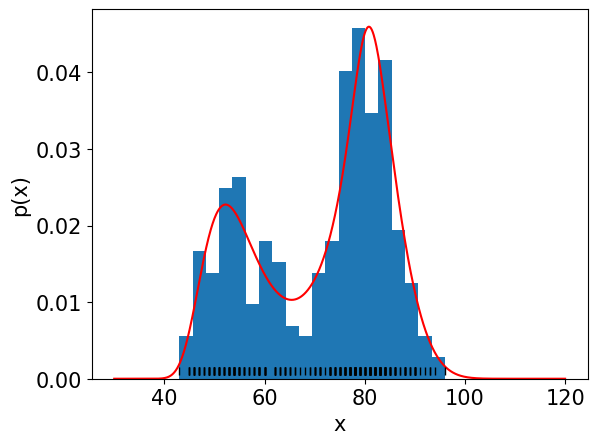

In [13]:
plt.rcParams.update({'font.size': 15}) #Macht grosse axen
plt.hist(X, 20, density=True)  # density-histogram 
xs = np.linspace(30,120,1000)
plt.plot(xs, dist.prob(xs), 'r-')  # prob density from the trained TransformDistribution
plt.plot(X, [0.001]*len(X), '|', color='k')
plt.xlabel('x')
plt.ylabel('p(x)')

In [14]:
bijector.forward(0) # z=0 -> x = 75..8 

<tf.Tensor: shape=(), dtype=float32, numpy=75.83435>

Text(0, 0.5, 'x')

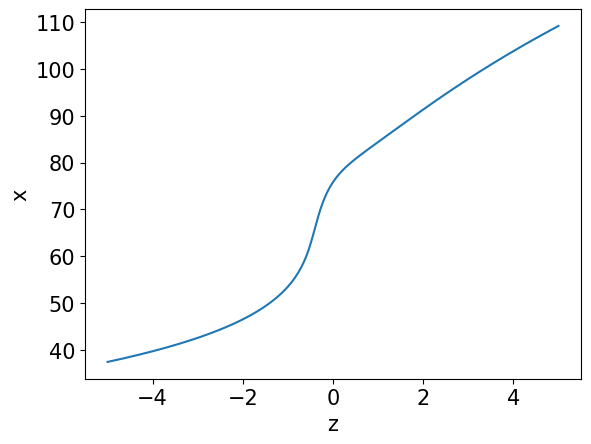

In [15]:
zz = np.linspace(-5,5,1000)
plt.plot(zz, bijector.forward(zz))
plt.xlabel('z')
plt.ylabel('x')

(array([ 4.,  9., 19., 38., 56., 62., 49., 20., 11.,  4.]),
 array([-2.866518  , -2.3096907 , -1.7528633 , -1.1960359 , -0.6392085 ,
        -0.08238113,  0.47444624,  1.0312736 ,  1.588101  ,  2.1449285 ,
         2.7017558 ], dtype=float32),
 <BarContainer object of 10 artists>)

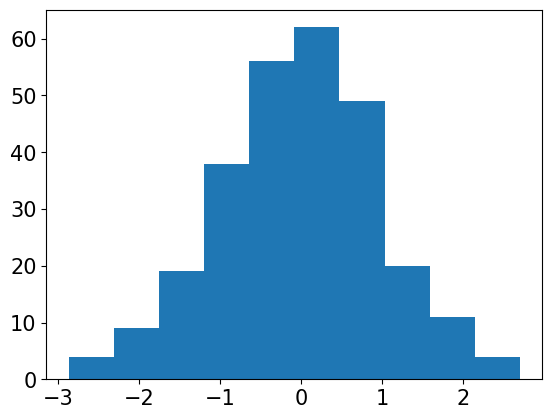

In [16]:
z = bijector.inverse(X)
plt.hist(z.numpy())  # observed X mapped to z space 

(array([ 1.,  8.,  7., 10.,  6., 12., 15.,  7.,  4., 13.,  4.,  7.,  3.,
         3.,  3.,  9.,  8.,  6., 17., 27., 18., 13., 26., 16.,  8.,  6.,
         9.,  2.,  3.,  1.]),
 array([43.      , 44.766666, 46.533333, 48.3     , 50.066666, 51.833332,
        53.6     , 55.366665, 57.133335, 58.9     , 60.666668, 62.433334,
        64.2     , 65.96667 , 67.73333 , 69.5     , 71.26667 , 73.03333 ,
        74.8     , 76.566666, 78.333336, 80.1     , 81.86667 , 83.63333 ,
        85.4     , 87.166664, 88.933334, 90.7     , 92.46667 , 94.23333 ,
        96.      ], dtype=float32),
 <BarContainer object of 30 artists>)

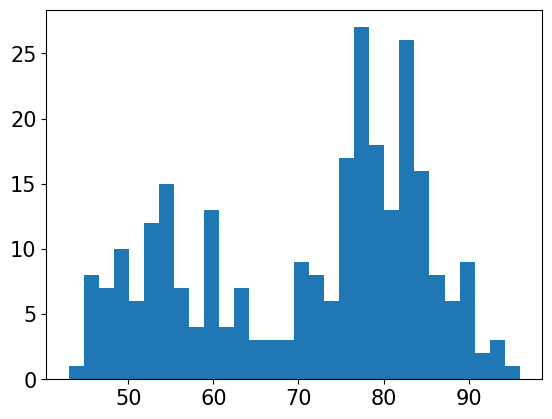

In [17]:
xx = bijector.forward(z)
plt.hist(xx.numpy(), 30)

In [18]:
sum(X - xx.numpy()) # becomes exact match after training 

array([0.], dtype=float32)

In [19]:
dir(dist)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_allow_nan_stats',
 '_batch_shape',
 '_batch_shape_tensor',
 '_bijector',
 '_broadcast_parameters_with_batch_shape',
 '_call_cdf',
 '_call_log_cdf',
 '_call_log_prob',
 '_call_log_survival_function',
 '_call_prob',
 '_call_quantile',
 '_call_sample_and_log_prob',
 '_call_sample_n',
 '_call_survival_function',
 '_call_unnormalized_log_prob',
 '_cdf',
 '_checkpoint_dependencies',
 '_composite_tensor_nonshape_params',
 '_composite_tensor_params',
 '_composite_tensor_shape_params',
 '_cova

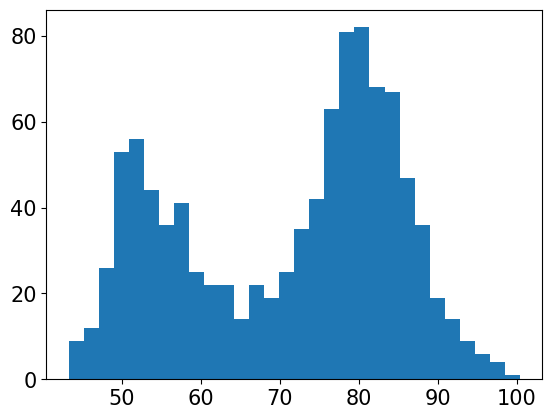

In [20]:
plt.hist(dist.sample((1000,1), seed=42).numpy(), 30); # sampled from learned distribution

## Example 2 (copied from Keras examples -- skip to Example 3 for a simpler case)


In [52]:
# https://keras.io/examples/generative/real_nvp/
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_probability as tfp

data = make_moons(3000, noise=0.05)[0].astype("float32")
norm = layers.Normalization()
norm.adapt(data)
normalized_data = norm(data)

# Creating a custom layer with keras API.
output_dim = 256
reg = 0.01

# Generates a coupling model
# s, t = scale and translation functions 
def Coupling(input_shape):
    input = keras.layers.Input(shape=input_shape)

    t_layer_1 = keras.layers.Dense(
        output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(input)
    t_layer_2 = keras.layers.Dense(
        output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(t_layer_1)
    t_layer_3 = keras.layers.Dense(
        output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(t_layer_2)
    t_layer_4 = keras.layers.Dense(
        output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(t_layer_3)
    t_layer_5 = keras.layers.Dense(
        input_shape, activation="linear", kernel_regularizer=regularizers.l2(reg))(t_layer_4)

    s_layer_1 = keras.layers.Dense(
        output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(input)
    s_layer_2 = keras.layers.Dense(
        output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(s_layer_1)
    s_layer_3 = keras.layers.Dense(
        output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(s_layer_2)
    s_layer_4 = keras.layers.Dense(
        output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(s_layer_3)
    s_layer_5 = keras.layers.Dense(
        input_shape, activation="tanh", kernel_regularizer=regularizers.l2(reg))(s_layer_4)

    return keras.Model(inputs=input, outputs=[s_layer_5, t_layer_5])


In [416]:
  np.array([2, 2]) *   np.array([0, 1]) 

array([0, 2])

In [ ]:
class RealNVP(keras.Model):
    def __init__(self, num_coupling_layers):
        super(RealNVP, self).__init__()

        self.num_coupling_layers = num_coupling_layers

        # Distribution of the latent space.
        self.distribution = tfp.distributions.MultivariateNormalDiag(
            loc=[0.0, 0.0], scale_diag=[1.0, 1.0]
        )
        self.masks = np.array( # spatial checkboard patterns masking and chennel-wise masking, see section 3.4
            [[0, 1], [1, 0]] * (num_coupling_layers // 2), dtype="float32"
        )
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.layers_list = [Coupling(2) for i in range(num_coupling_layers)]

    @property
    def metrics(self):
        """List of the model's metrics.
        We make sure the loss tracker is listed as part of `model.metrics`
        so that `fit()` and `evaluate()` are able to `reset()` the loss tracker
        at the start of each epoch and at the start of an `evaluate()` call.
        """
        return [self.loss_tracker]

    def call(self, x, training=True):
        log_det_inv = 0
        direction = 1
        if training:
            direction = -1
        for i in range(self.num_coupling_layers)[::direction]:
            x_masked = x * self.masks[i]
            reversed_mask = 1 - self.masks[i]
            s, t = self.layers_list[i](x_masked)
            s *= reversed_mask
            t *= reversed_mask
            gate = (direction - 1) / 2
            x = ( # see equation 9
                reversed_mask
                * (x * tf.exp(direction * s) + direction * t * tf.exp(gate * s))
                + x_masked
            )
            log_det_inv += gate * tf.reduce_sum(s, [1])

        return x, log_det_inv
    
    
    # Log likelihood of the normal distribution plus the log determinant of the jacobian.

    def log_loss(self, x):
        y, logdet = self(x)
        log_likelihood = self.distribution.log_prob(y) + logdet
        return -tf.reduce_mean(log_likelihood)

    def train_step(self, data):
        with tf.GradientTape() as tape:

            loss = self.log_loss(data)

        g = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(g, self.trainable_variables))
        self.loss_tracker.update_state(loss)

        return {"loss": self.loss_tracker.result()}

    def test_step(self, data):
        loss = self.log_loss(data)
        self.loss_tracker.update_state(loss)

        return {"loss": self.loss_tracker.result()}

In [53]:
model = RealNVP(num_coupling_layers=6)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001))

history = model.fit(
    normalized_data, batch_size=256, epochs=300, verbose=2, validation_split=0.2
)

Epoch 1/300
10/10 - 24s - loss: 2.7135 - val_loss: 2.6308
Epoch 2/300
10/10 - 1s - loss: 2.6055 - val_loss: 2.5803
Epoch 3/300
10/10 - 1s - loss: 2.5463 - val_loss: 2.5351
Epoch 4/300
10/10 - 1s - loss: 2.5026 - val_loss: 2.4946
Epoch 5/300
10/10 - 1s - loss: 2.4630 - val_loss: 2.4661
Epoch 6/300
10/10 - 1s - loss: 2.4316 - val_loss: 2.4288
Epoch 7/300
10/10 - 1s - loss: 2.3982 - val_loss: 2.4133
Epoch 8/300
10/10 - 1s - loss: 2.3707 - val_loss: 2.3820
Epoch 9/300
10/10 - 1s - loss: 2.3433 - val_loss: 2.3440
Epoch 10/300
10/10 - 1s - loss: 2.3137 - val_loss: 2.3178
Epoch 11/300
10/10 - 1s - loss: 2.2904 - val_loss: 2.2952
Epoch 12/300
10/10 - 1s - loss: 2.2705 - val_loss: 2.2717
Epoch 13/300
10/10 - 1s - loss: 2.2484 - val_loss: 2.2471
Epoch 14/300
10/10 - 1s - loss: 2.2247 - val_loss: 2.2250
Epoch 15/300
10/10 - 1s - loss: 2.2023 - val_loss: 2.1928
Epoch 16/300
10/10 - 1s - loss: 2.1799 - val_loss: 2.1554
Epoch 17/300
10/10 - 1s - loss: 2.1589 - val_loss: 2.1450
Epoch 18/300
10/10 - 1

Epoch 142/300
10/10 - 1s - loss: 1.2385 - val_loss: 1.4356
Epoch 143/300
10/10 - 1s - loss: 1.2365 - val_loss: 1.3246
Epoch 144/300
10/10 - 1s - loss: 1.2654 - val_loss: 1.3831
Epoch 145/300
10/10 - 1s - loss: 1.2363 - val_loss: 1.3076
Epoch 146/300
10/10 - 1s - loss: 1.2268 - val_loss: 1.3766
Epoch 147/300
10/10 - 1s - loss: 1.2451 - val_loss: 1.3261
Epoch 148/300
10/10 - 1s - loss: 1.2461 - val_loss: 1.4270
Epoch 149/300
10/10 - 1s - loss: 1.2694 - val_loss: 1.4031
Epoch 150/300
10/10 - 1s - loss: 1.2772 - val_loss: 1.4020
Epoch 151/300
10/10 - 1s - loss: 1.2615 - val_loss: 1.3005
Epoch 152/300
10/10 - 1s - loss: 1.2565 - val_loss: 1.3581
Epoch 153/300
10/10 - 1s - loss: 1.2503 - val_loss: 1.3801
Epoch 154/300
10/10 - 1s - loss: 1.2458 - val_loss: 1.4316
Epoch 155/300
10/10 - 1s - loss: 1.3033 - val_loss: 1.3507
Epoch 156/300
10/10 - 1s - loss: 1.2504 - val_loss: 1.4263
Epoch 157/300
10/10 - 1s - loss: 1.2660 - val_loss: 1.3692
Epoch 158/300
10/10 - 1s - loss: 1.2402 - val_loss: 1.29

Epoch 281/300
10/10 - 1s - loss: 1.2158 - val_loss: 1.2795
Epoch 282/300
10/10 - 1s - loss: 1.1914 - val_loss: 1.3881
Epoch 283/300
10/10 - 1s - loss: 1.1829 - val_loss: 1.3785
Epoch 284/300
10/10 - 1s - loss: 1.1848 - val_loss: 1.3544
Epoch 285/300
10/10 - 1s - loss: 1.1822 - val_loss: 1.2745
Epoch 286/300
10/10 - 1s - loss: 1.1894 - val_loss: 1.3098
Epoch 287/300
10/10 - 1s - loss: 1.1824 - val_loss: 1.4187
Epoch 288/300
10/10 - 1s - loss: 1.1911 - val_loss: 1.2923
Epoch 289/300
10/10 - 1s - loss: 1.1877 - val_loss: 1.3404
Epoch 290/300
10/10 - 1s - loss: 1.1977 - val_loss: 1.3160
Epoch 291/300
10/10 - 1s - loss: 1.1844 - val_loss: 1.4126
Epoch 292/300
10/10 - 1s - loss: 1.2122 - val_loss: 1.2956
Epoch 293/300
10/10 - 1s - loss: 1.1970 - val_loss: 1.2999
Epoch 294/300
10/10 - 1s - loss: 1.1901 - val_loss: 1.4221
Epoch 295/300
10/10 - 1s - loss: 1.2060 - val_loss: 1.3067
Epoch 296/300
10/10 - 1s - loss: 1.1989 - val_loss: 1.3360
Epoch 297/300
10/10 - 1s - loss: 1.1821 - val_loss: 1.29

In [57]:
model.summary() # doesn't show trainable params 

Model: "real_nvp_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.trainable_variables

[<tf.Variable 'dense_104/kernel:0' shape=(2, 256) dtype=float32, numpy=
 array([[ 0.07988982,  0.14882615, -0.09395017, -0.01300754,  0.13109547,
          0.03623644,  0.05028787,  0.07657427,  0.07873842,  0.11804482,
          0.07460763,  0.12257618,  0.14378184, -0.08548751,  0.13061869,
          0.13974595,  0.12758097,  0.12931502, -0.07572231,  0.14614874,
          0.02154742, -0.14714715, -0.06909397,  0.01308076,  0.01462379,
          0.0505731 ,  0.01210313,  0.08360566, -0.02521724, -0.01879829,
         -0.04617241, -0.13439848,  0.02001953,  0.14726588,  0.11250359,
          0.01341112, -0.11908494,  0.10121241,  0.14498618,  0.07929216,
          0.01392931,  0.0335855 ,  0.11583215, -0.10838328,  0.11692634,
         -0.07053293, -0.11448686, -0.00167817, -0.11963304,  0.14819497,
         -0.02494349, -0.03197013,  0.01694767,  0.04296112,  0.09878719,
          0.11135909, -0.04288012,  0.06259181, -0.0924928 ,  0.08186308,
         -0.08759291,  0.12045878, -0.07

(-2.0, 2.0)

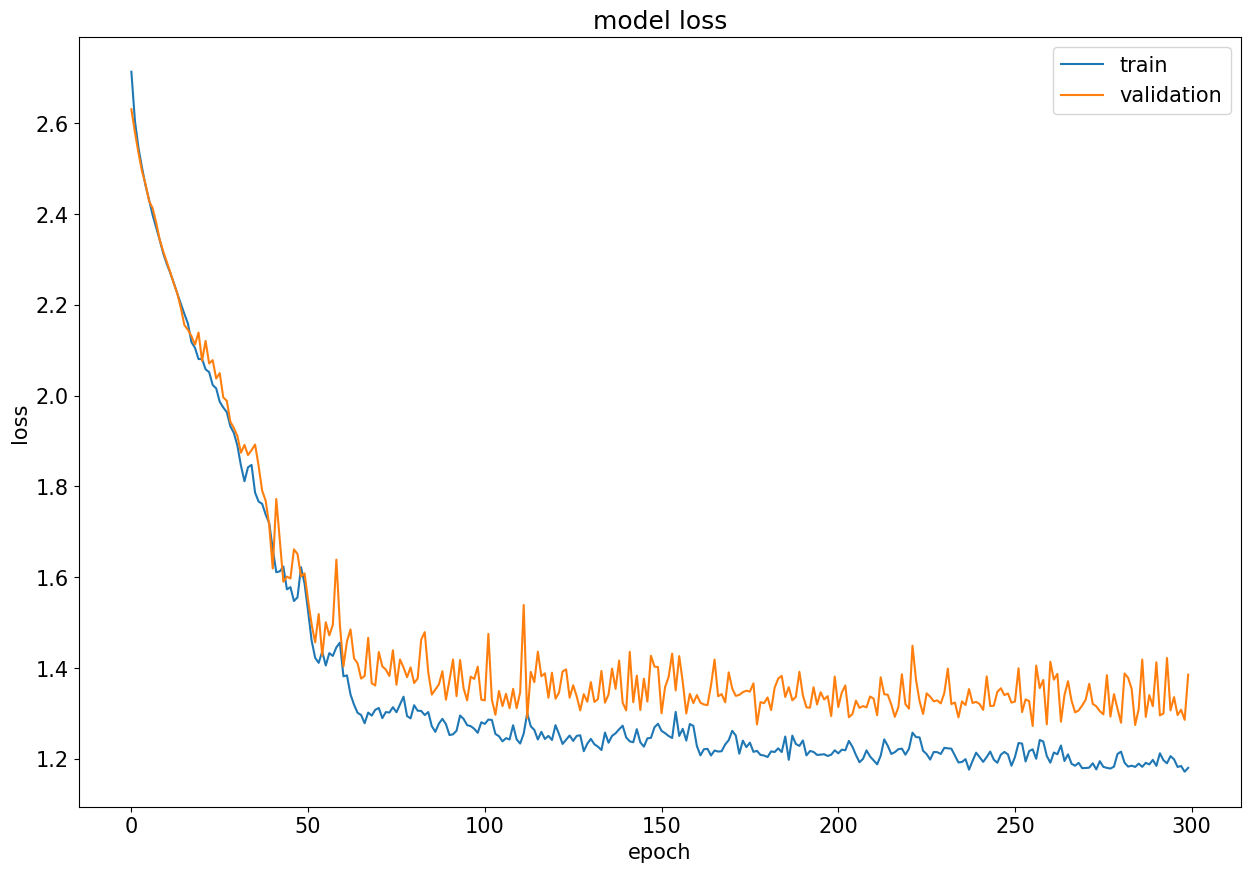

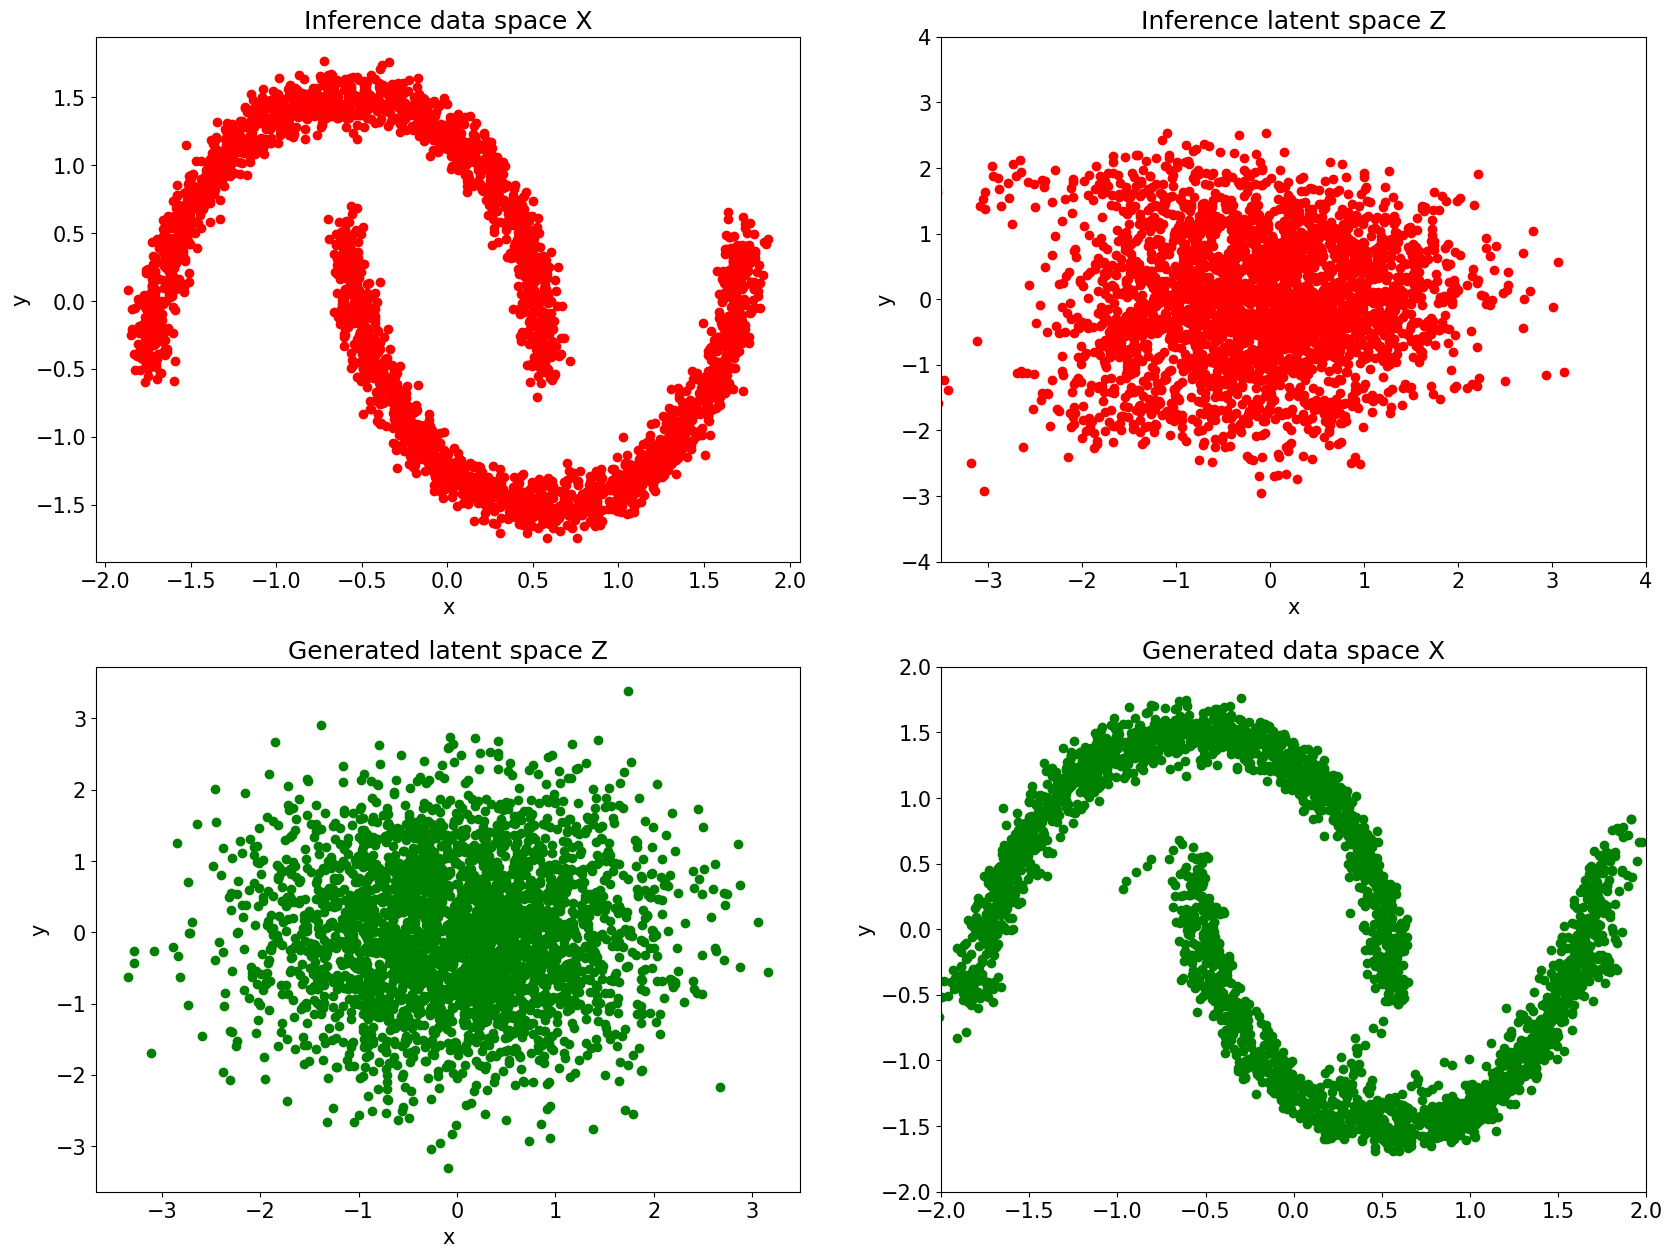

In [54]:
plt.figure(figsize=(15, 10))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.legend(["train", "validation"], loc="upper right")
plt.ylabel("loss")
plt.xlabel("epoch")

# From data to latent space.
z, _ = model(normalized_data)

# From latent space to data.
samples = model.distribution.sample(3000)
x, _ = model.predict(samples)

f, axes = plt.subplots(2, 2)
f.set_size_inches(20, 15)

axes[0, 0].scatter(normalized_data[:, 0], normalized_data[:, 1], color="r")
axes[0, 0].set(title="Inference data space X", xlabel="x", ylabel="y")
axes[0, 1].scatter(z[:, 0], z[:, 1], color="r")
axes[0, 1].set(title="Inference latent space Z", xlabel="x", ylabel="y")
axes[0, 1].set_xlim([-3.5, 4])
axes[0, 1].set_ylim([-4, 4])
axes[1, 0].scatter(samples[:, 0], samples[:, 1], color="g")
axes[1, 0].set(title="Generated latent space Z", xlabel="x", ylabel="y")
axes[1, 1].scatter(x[:, 0], x[:, 1], color="g")
axes[1, 1].set(title="Generated data space X", label="x", ylabel="y")
axes[1, 1].set_xlim([-2, 2])
axes[1, 1].set_ylim([-2, 2])    

## Example 3

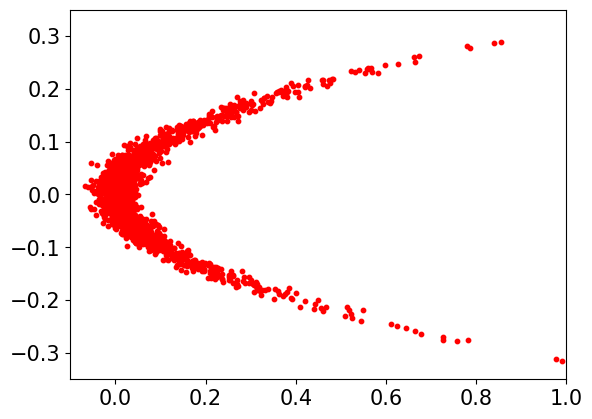

In [208]:
from sklearn.model_selection import train_test_split

def sample(num):
    return np.array(np.random.uniform(-1,1,(num,2)), dtype='float32') #A real hard problem

# Adapted from: https://blog.evjang.com/2018/01/nf1.html
def sample_2(batch_size=500):
    x2_dist = tfd.Normal(loc=0., scale=4.)
    x2_samples = x2_dist.sample(batch_size)
    x1 = tfd.Normal(loc=.25 * tf.square(x2_samples),
                    scale=tf.ones(batch_size, dtype=tf.float32))
    x1_samples = x1.sample()
    x_samples = tf.stack([x1_samples, x2_samples], axis=1)
    return x_samples.numpy()/40.0


X = sample_2(1500)
xlim, ylim = [-2, 2], [-2, 2]
plt.scatter(X[:, 0], X[:, 1], s=10, color='red')
plt.xlim(-0.1,1)
plt.ylim(-0.35,0.35)
plt.show()

In [356]:
# See also https://github.com/tensorflow/probability/blob/master/tensorflow_probability/python/bijectors/real_nvp.py
# see also https://github.com/bsaund/normalizing_flows/blob/master/generate_points.py
from pylab import *
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
from time import time

tfb = tfp.bijectors
tfd = tfp.distributions

class Flow(tf.keras.models.Model):
    def __init__(self, **kwargs):
        super(Flow, self).__init__(**kwargs)
        flow = None

    def call(self, *inputs):
        return self.flow.bijector.forward(*inputs)

    @tf.function
    def train_step(self, X, optimizer):
        with tf.GradientTape() as tape:
            loss = -tf.reduce_mean(self.flow.log_prob(X, training=True))
            gradients = tape.gradient(loss, self.trainable_variables)
            optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        return loss
    
    def train(self, X, optimizer, epochs = 1000, batch_size=32, print_period=1000):
        start = time()
        ds = create_ds(X, batch_size=batch_size) 
        itr = ds.__iter__()
        for i in range(epochs + 1):
            X_i = next(itr)
            loss = self.train_step(X_i, optimizer).numpy()
            if i % print_period == 0:
                print("{} loss: {}, {}s".format(i, loss, time() - start))
                if np.isnan(loss):
                    break
        return loss
           
    def build_model(self):
        # Run a pass of the model to initialize the tensorflow network
        x = self.flow.distribution.sample(8000)
        for bijector in reversed(self.flow.bijector.bijectors):
            x = bijector.forward(x)
            
    def create_ds(X, batch_size=32, buffer_size=9000):
        ds = tf.data.Dataset.from_tensor_slices(X)
        ds = ds.repeat()
        ds = ds.shuffle(buffer_size)
        ds = ds.prefetch(3 * batch_size)
        ds = ds.batch(batch_size)
        return ds

        
class RealNVP(Flow):
    def __init__(self, output_dim, num_masked, **kwargs): #** additional arguments for the super class
        super(RealNVP, self).__init__(**kwargs)
        self.output_dim = output_dim
        self.num_masked = num_masked
        self.nets=[]
        bijectors=[] #A
        num_blocks = 5 #B
        h = 32  # C
        
        for i in range(num_blocks): 
            net =tfb.real_nvp_default_template(hidden_layers=[h, h]) #D
            bijectors.append(
                tfb.RealNVP(shift_and_log_scale_fn=net, 
                            num_masked=self.num_masked)) #E
            bijectors.append(tfb.BatchNormalization())
            bijectors.append(tfb.Permute(permutation=[1,0])) #F
            self.nets.append(net) 
        bijector = tfb.Chain(list(reversed(bijectors[:-1])))
        self.bijector = bijector 
        
        self.flow = tfd.TransformedDistribution( #G
            distribution=tfd.MultivariateNormalDiag(loc=[0., 0.]), 
            bijector=bijector)
        
        
class MAF(Flow):
    def __init__(self, output_dim, num_masked, **kwargs):
        super().__init__(**kwargs)
        self.output_dim = output_dim
        self.num_masked = num_masked
        self.nets=[]
        bijectors=[] #A
        num_blocks = 5 #B
        h = 32  # C
        
        for i in range(num_blocks):
            net = tfb.masked_autoregressive_default_template(hidden_layers=[h, h])
            bijectors.append(
                tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn=net)
            )
            
            if i%2 == 0:
                bijectors.append(tfb.BatchNormalization())

            bijectors.append(tfb.Permute(permutation=[1, 0]))
            self.nets.append(net)
        bijector = tfb.Chain(list(reversed(bijectors[:-1])))
        self.bijector = bijector 
        
        self.flow = tfd.TransformedDistribution(
            distribution=tfd.MultivariateNormalDiag(loc=[0.0, 0.0]),
            bijector=bijector)
        
#A List of bijectors, to this list we add num_blocks of coupling permutations blocks   
#B Number of hidden layers in the NF model
#C size of the hidden layers 
#D Definition of the Network
#E A shift and flow with parameters from the network
#F Permutation of coordinates
#G Distribution using z with two independent Gaussians



In [403]:
# note: training may not be very stable 
model = RealNVP(output_dim=2, num_masked=1)
model(X)
model.build_model()
print(model.summary())
loss = model.train(X, batch_size = 32,  
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                   epochs=50000,  print_period=1000)        

Model: "real_nvp_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 40
Trainable params: 20
Non-trainable params: 20
_________________________________________________________________
None
0 loss: -0.12488983571529388, 3.7575032711029053s
1000 loss: -0.7641034126281738, 5.096496343612671s
2000 loss: -1.5634355545043945, 6.513756513595581s
3000 loss: -0.712520956993103, 7.8452136516571045s
4000 loss: -2.082915782928467, 9.163550853729248s
5000 loss: -2.094109058380127, 10.512171030044556s
6000 loss: -2.003753423690796, 11.809950351715088s
7000 loss: -2.9668846130371094, 13.096519947052002s
8000 loss: -2.2531516551971436, 14.376542091369629s
9000 loss: -2.496361255645752, 15.661575317382812s
10000 loss: -2.817401885986328, 17.12997817993164s
11000 loss: -2.62864351272583, 18.4545841217041s
12000 loss: -3.087507963180542, 19.78308892250061s
13000 loss: -2.6138319969177246, 21.156195640563965s

In [404]:
len(model.trainable_variables)

10

(-0.35, 0.35)

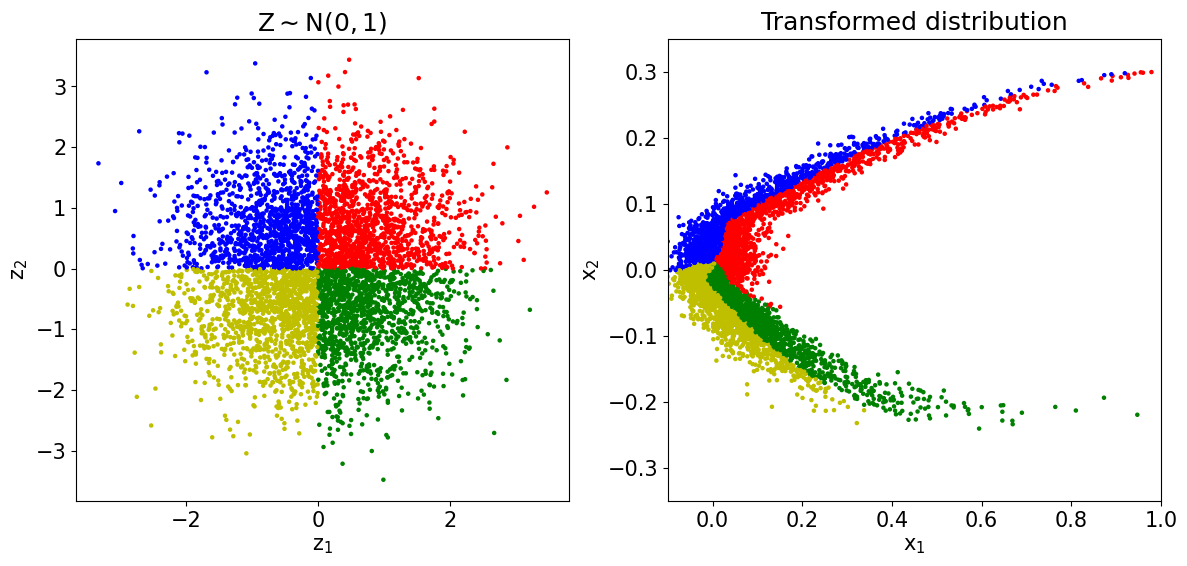

In [405]:
Z = np.random.normal(0,1,(5000,2))
cols = []
for i in range(5000):
    if (Z[i,0] > 0 and Z[i,1] > 0):
        cols.append('r')
    elif (Z[i,0] < 0 and Z[i,1] > 0):
        cols.append('b')
    elif (Z[i,0] < 0 and Z[i,1] < 0):
        cols.append('y')
    else:
        cols.append('g')

plt.figure(figsize=(14,6))
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

plt.subplot(1,2,1)
plt.scatter(Z[:, 0], Z[:, 1], s=5,c=cols)
plt.title('$Z \sim N(0,1)$')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
Xs = model(Z)  # <- transform random Z onto X's variable space

plt.subplot(1,2,2)
plt.title('Transformed distribution')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(Xs[:,0], Xs[:, 1], s=5, c=cols)
xlim([-0.1,1])
ylim([-0.35,0.35])

In [387]:
def plot_layers(dist, final=False):
    """
    Generate samples from the base distribution and visualize the motion of the points after each 
    layer transformation
    """
    x = dist.distribution.sample(8000)
    samples = [x]
    names = [dist.distribution.name]
    for bijector in reversed(dist.bijector.bijectors):
        x = bijector.forward(x)
        samples.append(x)
        names.append(bijector.name)

    results = samples

    X0 = results[0].numpy()

    rows = 4
    cols = int(len(results) / rows) + (len(results) % rows > 0)

    f, arr = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    i = 0
    # for i in range(len(results)):
    for r in range(rows):
        for c in range(cols):
            if i >= len(results):
                break
            X1 = results[i].numpy()
            idx = np.logical_and(X0[:, 0] < 0, X0[:, 1] < 0)
            arr[r, c].scatter(X1[idx, 0], X1[idx, 1], s=5, color='red')
            idx = np.logical_and(X0[:, 0] > 0, X0[:, 1] < 0)
            arr[r, c].scatter(X1[idx, 0], X1[idx, 1], s=5, color='green')
            idx = np.logical_and(X0[:, 0] < 0, X0[:, 1] > 0)
            arr[r, c].scatter(X1[idx, 0], X1[idx, 1], s=5, color='blue')
            idx = np.logical_and(X0[:, 0] > 0, X0[:, 1] > 0)
            arr[r, c].scatter(X1[idx, 0], X1[idx, 1], s=5, color='black')
            arr[r, c].set_xlim([-5, 5])
            arr[r, c].set_ylim([-5, 5])
            arr[r, c].set_title(names[i])
            arr[r, c].axis('equal')
            i += 1
    plt.show()

    if not final:
        return

    idx = np.logical_and(X0[:, 0] < 0, X0[:, 1] < 0)
    plt.scatter(X1[idx, 0], X1[idx, 1], s=5, color='red')
    idx = np.logical_and(X0[:, 0] > 0, X0[:, 1] < 0)
    plt.scatter(X1[idx, 0], X1[idx, 1], s=5, color='green')
    idx = np.logical_and(X0[:, 0] < 0, X0[:, 1] > 0)
    plt.scatter(X1[idx, 0], X1[idx, 1], s=5, color='blue')
    idx = np.logical_and(X0[:, 0] > 0, X0[:, 1] > 0)
    plt.scatter(X1[idx, 0], X1[idx, 1], s=5, color='black')
    plt.axis('equal')
    plt.show()

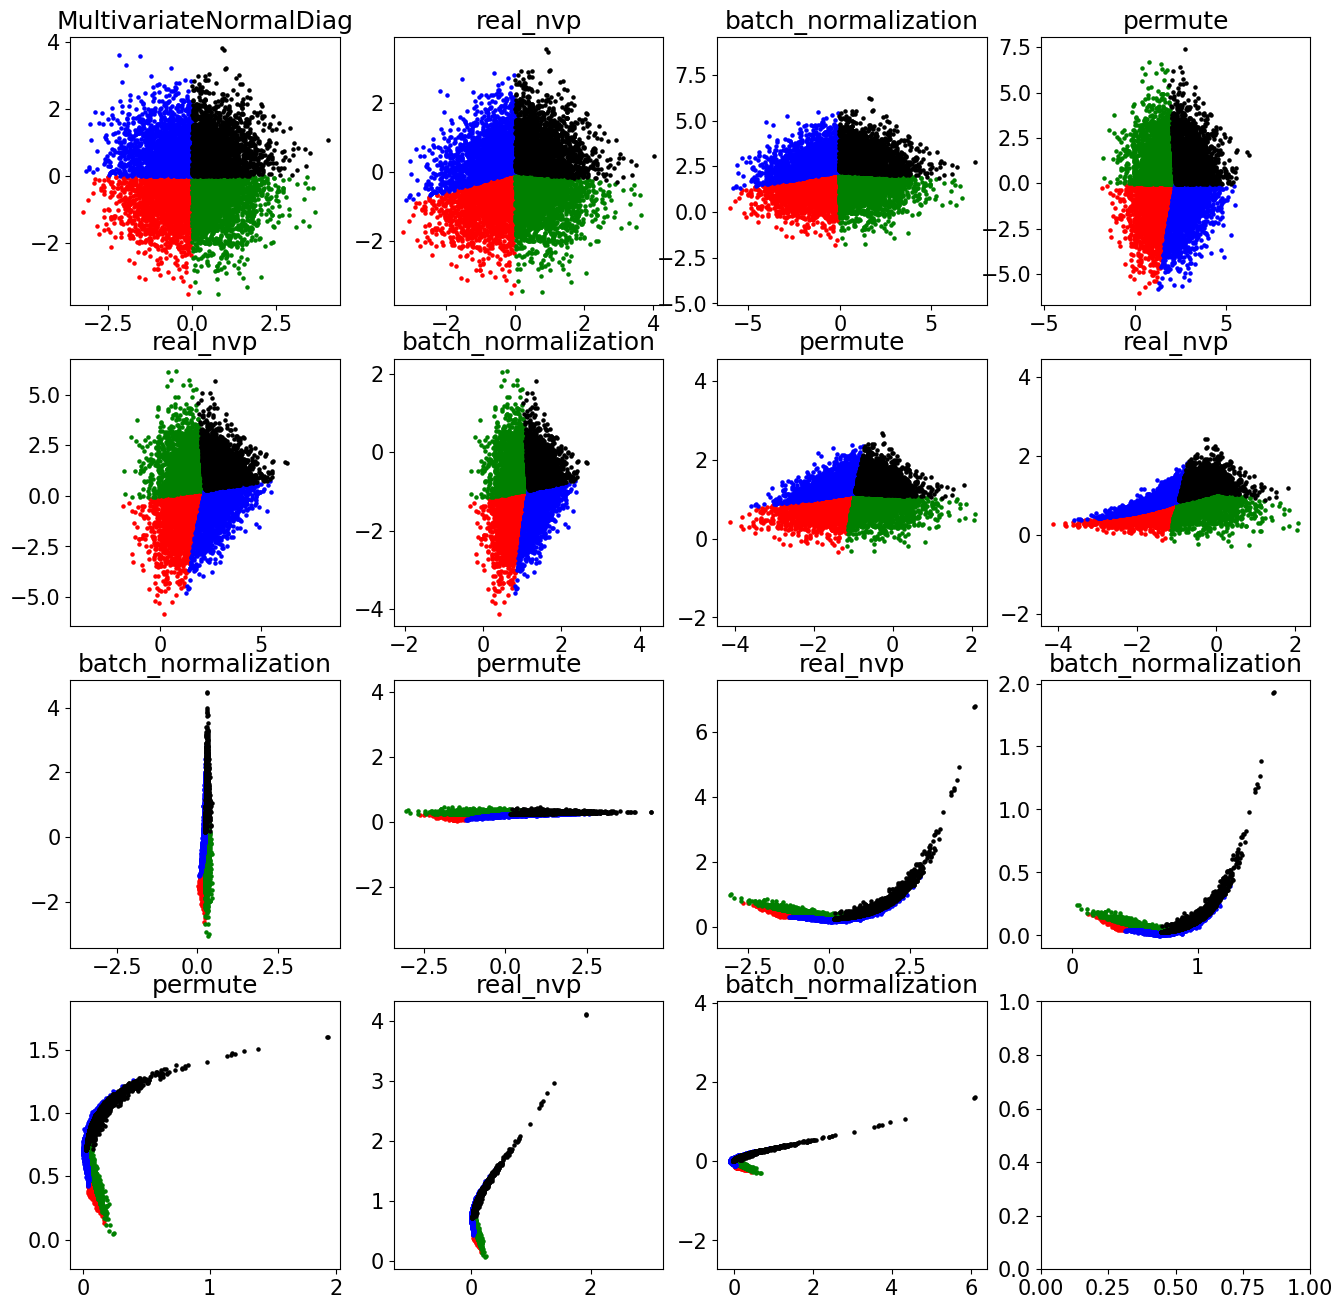

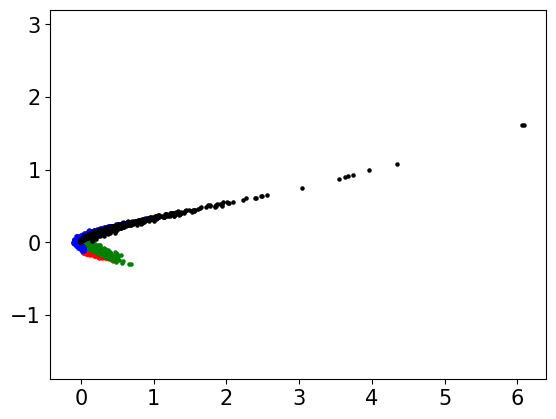

In [388]:
plot_layers(model.flow, final=True)

In [391]:
model2 = MAF(output_dim=2, num_masked=1)
model2(X)
model2.build_model()
print(model2.summary())
loss = model2.train(X, batch_size = 32, 
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
                   epochs=50000, print_period=5000)  

Model: "maf_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 24
Trainable params: 12
Non-trainable params: 12
_________________________________________________________________
None
0 loss: -2.1058237552642822, 2.697284698486328s
5000 loss: -2.748931407928467, 8.701441526412964s
10000 loss: -3.3577880859375, 15.431019067764282s
15000 loss: -2.9994821548461914, 22.218008041381836s
20000 loss: -2.607029914855957, 28.985011339187622s
25000 loss: -2.7193830013275146, 35.66796088218689s
30000 loss: -2.506056308746338, 42.517855644226074s
35000 loss: -2.6015172004699707, 49.436230421066284s
40000 loss: -2.718557596206665, 56.07003593444824s
45000 loss: -3.2688331604003906, 62.73453402519226s
50000 loss: -2.641374349594116, 69.53457498550415s


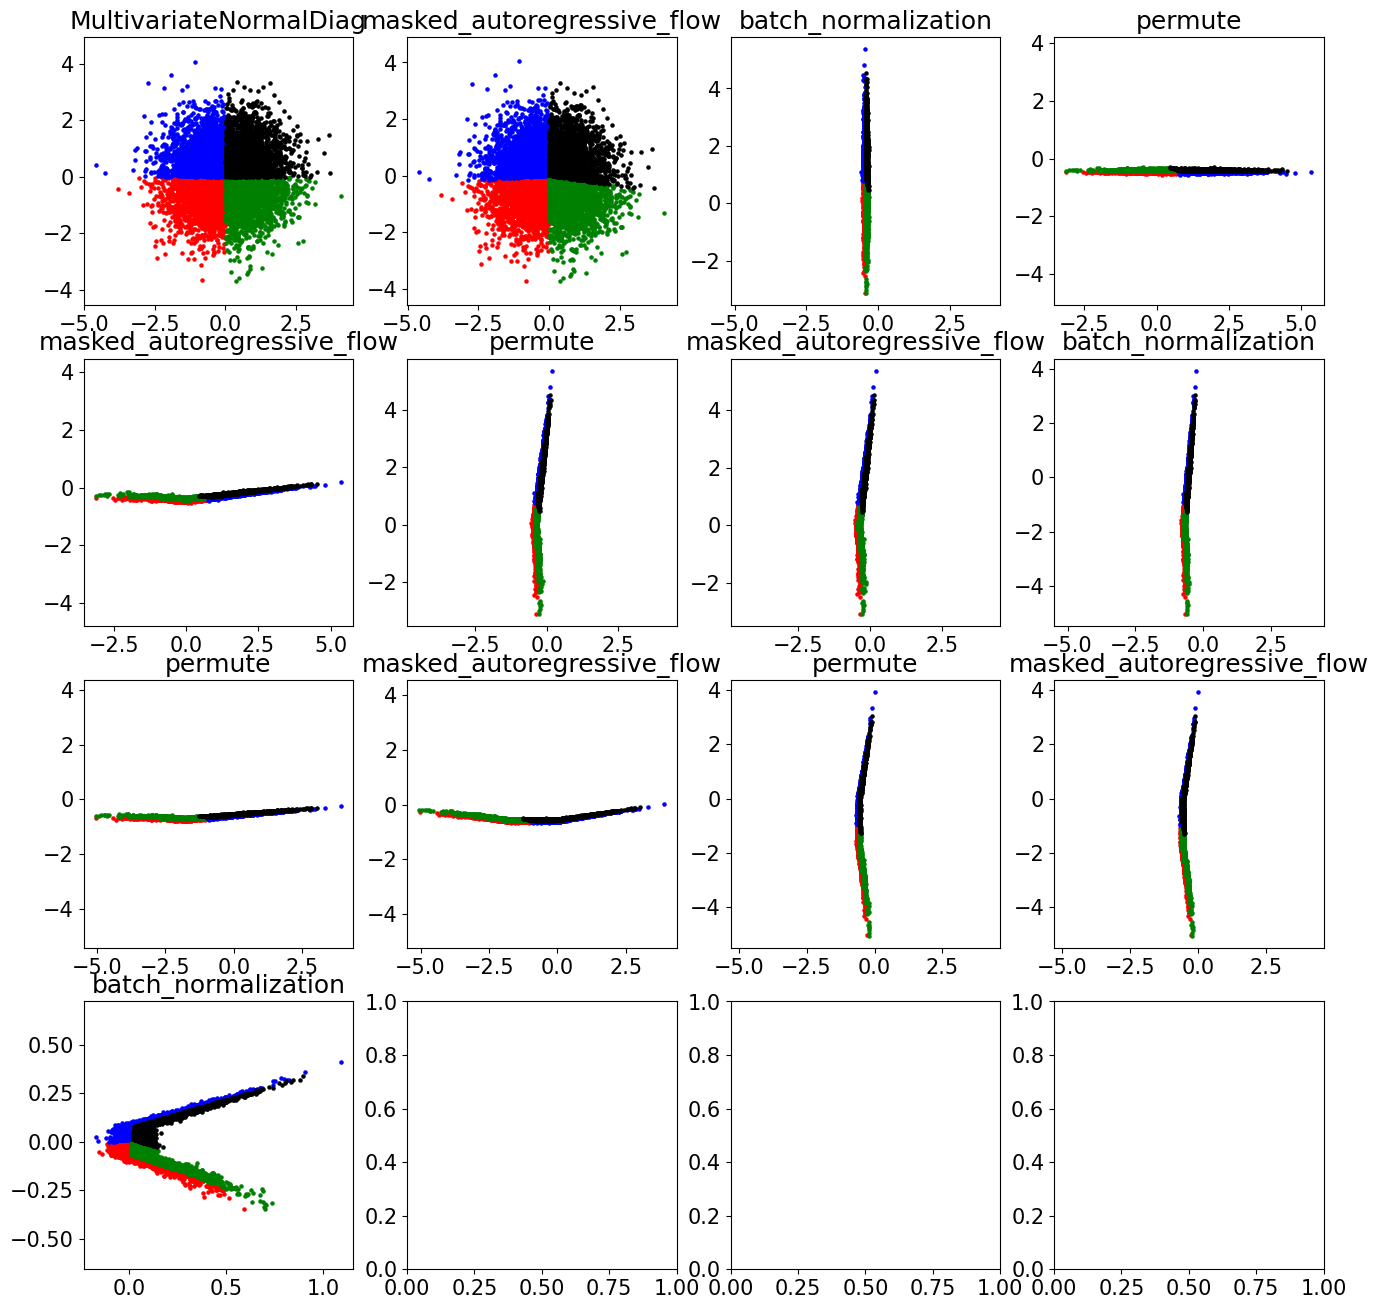

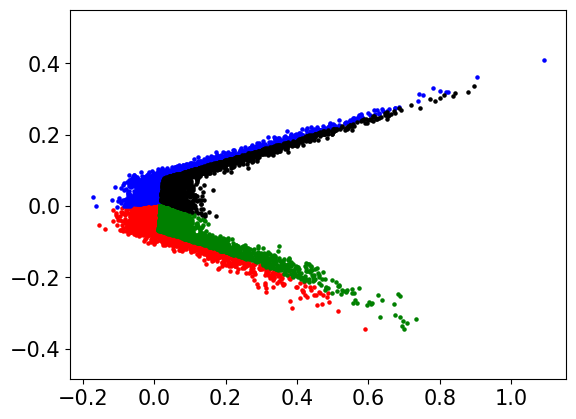

In [392]:
plot_layers(model2.flow, final=True)

In [393]:
X1 = np.array(([[0.6,0.25]]), dtype=float32)
X1

array([[0.6 , 0.25]], dtype=float32)

In [394]:
model.flow.bijector.inverse(X1) # inverse is not working --- it maps to the same data point for any value -- not sure why

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 0.00537324, -0.1497571 ]], dtype=float32)>

In [395]:
a1 = model.flow.bijector.inverse(np.array(([[0.2,0.85]]), dtype=float32))
a1, model.flow.bijector.forward(a1)  # forward(inverse()) works 

(<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 0.00537324, -0.1497571 ]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.2 , 0.85]], dtype=float32)>)

In [396]:
model.flow.bijector.trainable_variables[-1]

<tf.Variable 'real_nvp_73/chain_of_batch_normalization_of_real_nvp_of_permute_of_batch_normalization_of_real_nvp_of_permute_of_batch_normalization_of_real_nvp_of_permute_of_batch_normalization_of_real_nvp_of_permute_of_batch_normalization_of_real_nvp/forward/batch_normalization/forward/beta:0' shape=(2,) dtype=float32, numpy=array([ 0.00537323, -0.15025665], dtype=float32)>

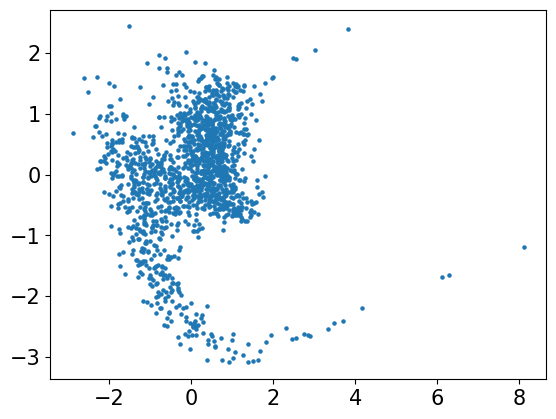

In [397]:
b1 = model.flow.bijector.inverse(X)
plt.scatter(b1[:,0], b1[:,1], s=5)

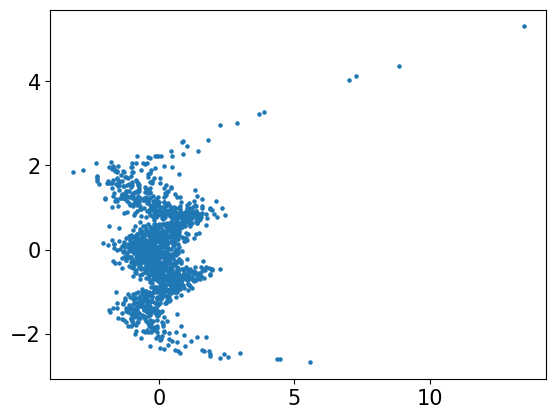

In [398]:
b2 = model2.flow.bijector.inverse(X)
plt.scatter(b2[:,0], b2[:,1], s=5)

In [298]:
X1 = np.array(([[0.9,0.25]]), dtype=float32)    #Starting point corresponing to Beyonce
X2 = np.array(([[0.8,-1.25]]), dtype=float32)   #End point corresponing to DiCaprio

Z1 = model.flow.bijector.inverse(X1)        # Same 
Z2 = model.flow.bijector.inverse(X2)

In [323]:
model.bijector.inverse(tf.convert_to_tensor([[0.1, 0.9]], dtype=float32))

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.01616859,  0.06628215]], dtype=float32)>

In [282]:
z1, z2

(array([-0.01616859,  0.06628215], dtype=float32),
 array([-0.01616859,  0.06628215], dtype=float32))

In [281]:
z1*.1+z2*(1.-.1)



array([-0.01616859,  0.06628215], dtype=float32)

In [276]:
Z_mixs = np.zeros((nums,2),dtype=np.float32)
z1 = Z1.numpy()[0]
z2 = Z2.numpy()[0]
for i,m in enumerate(np.linspace(0,1,nums)):
    print(m, z1*m+z2*(1.-m))
    Z_mixs[i] = z1*m+z2*(1.-m)
    

0.0 [-0.01616859  0.06628215]
0.002004008016032064 [-0.01616859  0.06628215]
0.004008016032064128 [-0.01616859  0.06628215]
0.0060120240480961915 [-0.01616859  0.06628215]
0.008016032064128256 [-0.01616859  0.06628215]
0.01002004008016032 [-0.01616859  0.06628215]
0.012024048096192383 [-0.01616859  0.06628215]
0.014028056112224447 [-0.01616859  0.06628215]
0.01603206412825651 [-0.01616859  0.06628215]
0.018036072144288574 [-0.01616859  0.06628215]
0.02004008016032064 [-0.01616859  0.06628215]
0.022044088176352703 [-0.0161686   0.06628215]
0.024048096192384766 [-0.01616859  0.06628215]
0.026052104208416832 [-0.01616859  0.06628215]
0.028056112224448895 [-0.0161686   0.06628215]
0.03006012024048096 [-0.01616859  0.06628215]
0.03206412825651302 [-0.01616859  0.06628215]
0.03406813627254509 [-0.01616859  0.06628215]
0.03607214428857715 [-0.01616859  0.06628215]
0.038076152304609215 [-0.01616859  0.06628215]
0.04008016032064128 [-0.01616859  0.06628215]
0.04208416833667334 [-0.01616859  0.0

c:\users\kmineg144\appdata\local\programs\python\python38\lib\site-packages\keras\engine\base_layer.py:2215: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
c:\users\kmineg144\appdata\local\programs\python\python38\lib\site-packages\keras\legacy_tf_layers\core.py:236: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
c:\users\kmineg144\appdata\local\programs\python\python38\lib\site-packages\keras\legacy_tf_layers\core.py:236: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
c:\users\kmineg144\appdata\local\programs\python\python38\lib\site-packages\keras\engine\base_layer.py:2215: UserWarning

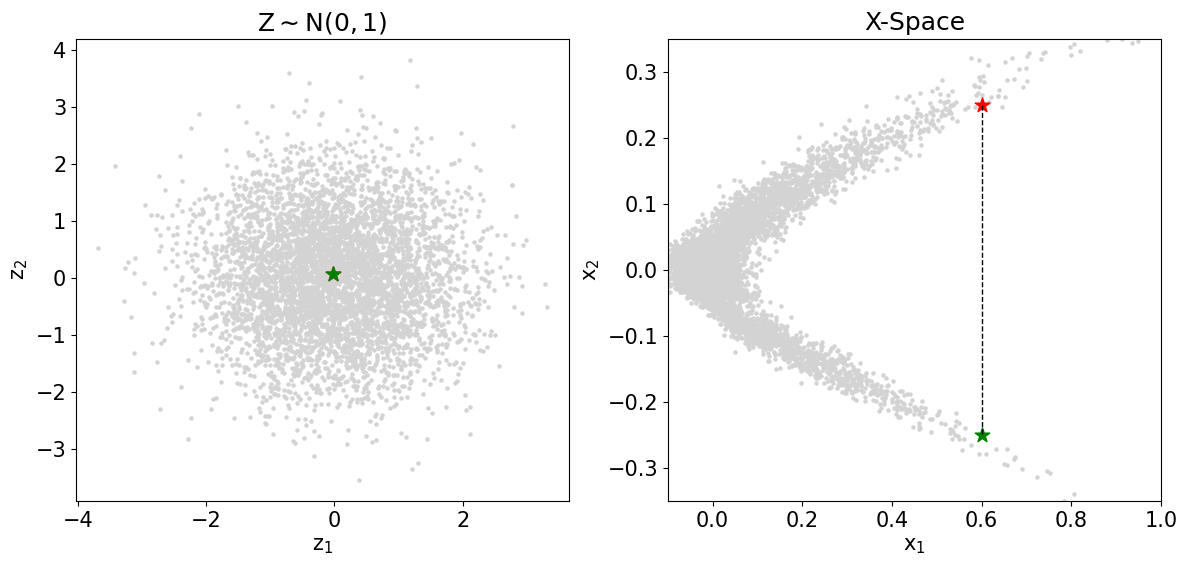

In [255]:
plt.style.use('default')
plt.rcParams.update({'font.size': 15}) 


X1 = np.array(([[0.6,0.25]]), dtype=float32)    #Starting point corresponing to Beyonce
X2 = np.array(([[0.6,-0.25]]), dtype=float32)   #End point corresponing to DiCaprio

Z1 = model.flow.bijector.inverse(X1)        # Same 
Z2 = model.flow.bijector.inverse(X2)

# Z1 = np.array((-1.5,-1.5), dtype=float32) 
# Z2= np.array((1.5,1.5), dtype=float32) 

nums = 500
Z_mixs = np.zeros((nums,2),dtype=np.float32)
for i,m in enumerate(np.linspace(0,1,nums)):
    Z_mixs[i] = (Z2*m+Z1*(1.-m))
    
    
plt.figure(figsize=(14,6))
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

plt.subplot(1,2,1)
plt.scatter(Z[:, 0], Z[:, 1], s=5,c='lightgray')
plt.plot(Z_mixs[:,0],Z_mixs[:,1],c='blue', linewidth=2)
plt.scatter(Z_mixs[0,0],Z_mixs[0,1],c='red', s=120,marker='*')
plt.scatter(Z_mixs[nums-1,0],Z_mixs[nums-1,1],c='green', s=120,marker='*')

plt.title('$Z \sim N(0,1)$')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')


plt.subplot(1,2,2)
plt.title('X-Space')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(Xs[:,0], Xs[:, 1], s=5,c='lightgray')
plt.xlim(-0.1,1)
plt.ylim(-0.35,0.35)
plt.scatter(X1[0,0], X1[0,1], s=10)
plt.scatter(X2[0,0], X2[0,1], s=10)
X_mix = model.flow.bijector.forward(Z_mixs)
plt.plot(X_mix[:,0],X_mix[:,1],c='blue',linewidth=2)
plt.scatter(X1[0,0], X1[0,1],c='red', s=120,marker='*')
plt.scatter(X2[0,0], X2[0,1],c='green', s=120,marker='*')

X_mixs = np.zeros((nums,2),dtype=np.float32)
for i,m in enumerate(np.linspace(0,1,nums)):
    X_mixs[i] = (X2*m+X1*(1.-m))
plt.plot(X_mixs[:,0],X_mixs[:,1],'--',c='black', linewidth=1.)